In [10]:
from glob import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import json

sns.set(context="paper", style="whitegrid", font_scale=1.5)
%matplotlib inline

In [2]:
exp_name = "200906_uci"

In [3]:
def plot_grid(runs, y, yerr=None, ylabel="performance", ylim=None, title=None):
    scales = sorted(runs.weight_scale.unique())
    temps = sorted(runs.temperature.unique())
    fig, axes = plt.subplots(len(scales), len(temps), sharex=True, sharey=True, figsize=(10,10))

    for scale, axs in zip(scales, axes):
        for temp, ax in zip(temps, axs):
            df = runs.sort_values(["weight_prior", "weight_scale"]).query(f"weight_scale == {scale} & temperature == {temp}")
            df.plot(x="weight_prior", y=y, yerr=yerr, kind="bar", legend=False, ax=ax)
            ax.set_title(f"scale={scale} and T={temp}")
            ax.set_ylabel(ylabel)
            if ylim is not None:
                ax.set_ylim(ylim)
    if title is not None:
        fig.suptitle(title)

    if title is not None:
        fig.tight_layout(rect=[0, 0, 1, 0.97])
    else:
        fig.tight_layout()
    return fig

In [4]:
runs = []
for config_file in glob(f"../results/{exp_name}/*/config.json"):
    with open(config_file) as infile:
        config = pd.Series(json.load(infile))
    with open(config_file[:-11] + "run.json") as infile:
        result = pd.Series(json.load(infile)["result"], dtype=np.float32)
    run_data = pd.concat([config, result])
    runs.append(run_data)
runs_all = pd.concat(runs, axis=1).T

In [5]:
runs_all.head()

,batch_size,batchnorm,bias_loc,bias_prior,bias_prior_params,bias_scale,burnin,cycles,data,device,...,weight_prior,weight_prior_params,weight_scale,width,acc_mean,acc_std,acc_stderr,lp_mean,lp_std,lp_stderr
0,None,True,0,gaussian,{},1,1000,20,UCI_boston,try_cuda,...,student-t_gamma,{},1.41,50,24.1043,105.233,10.5233,0.00854662,1.10224,0.154344
1,None,True,0,gaussian,{},1,1000,20,UCI_wine,try_cuda,...,gaussian_uniform,{},1.41,50,NaN,NaN,NaN,NaN,NaN,NaN
2,None,True,0,gaussian,{},1,1000,20,UCI_yacht,try_cuda,...,student-t_normal,{},1.41,50,NaN,NaN,NaN,NaN,NaN,NaN
3,None,True,0,gaussian,{},1,1000,20,UCI_kin8nm,try_cuda,...,mixture,{},1.41,50,NaN,NaN,NaN,NaN,NaN,NaN
4,None,True,0,gaussian,{},1,1000,20,UCI_energy,try_cuda,...,laplace_normal,{},0.7,50,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
datasets = sorted(runs_all.data.unique())

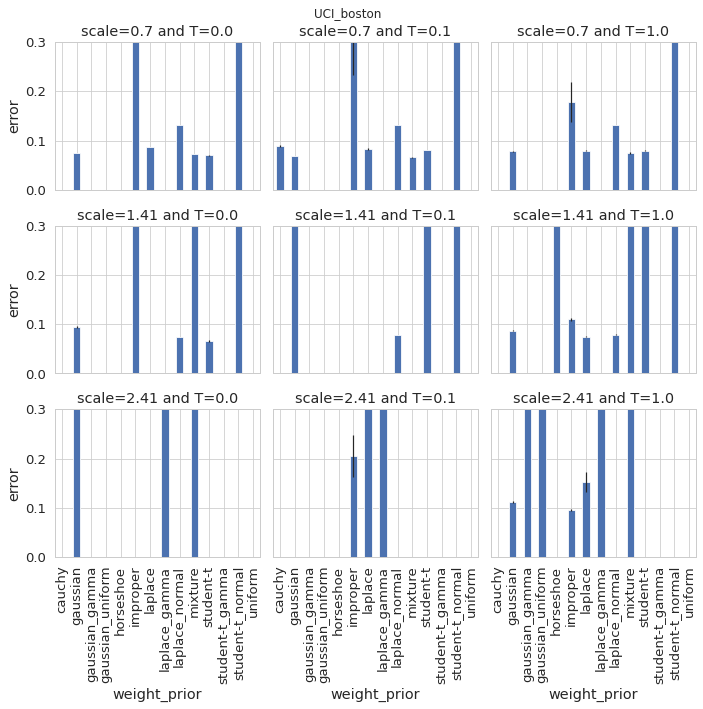

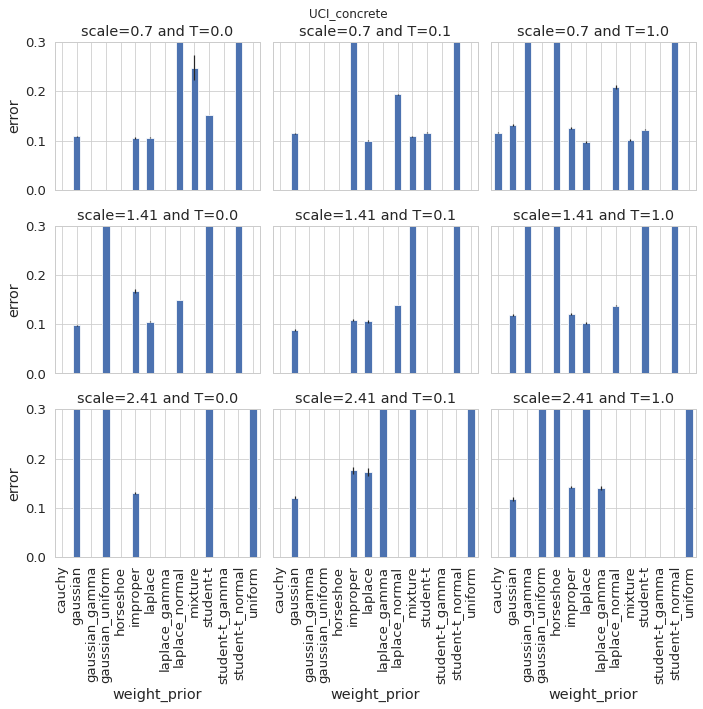

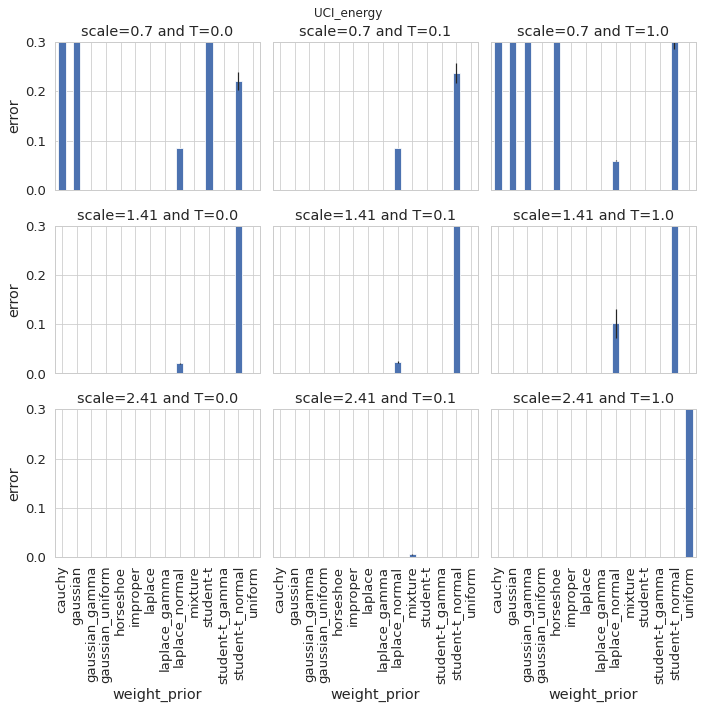

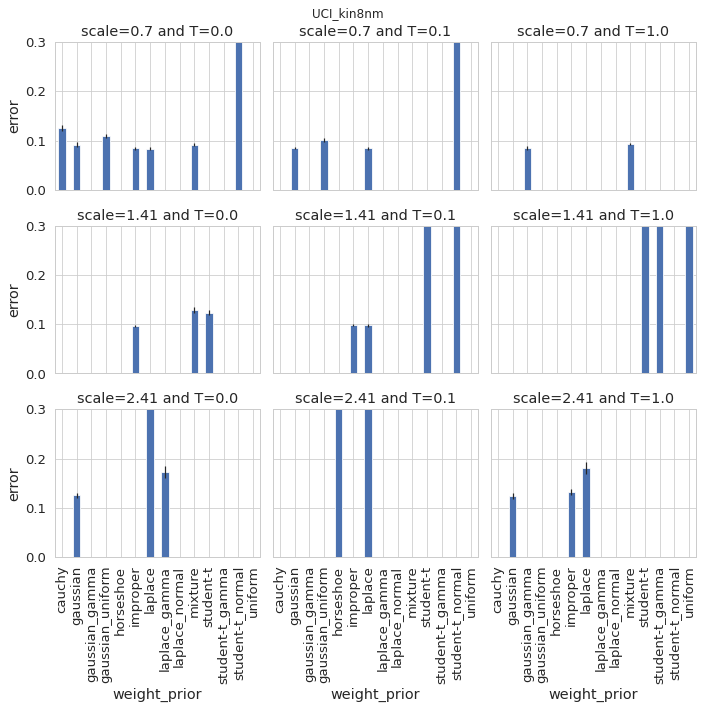

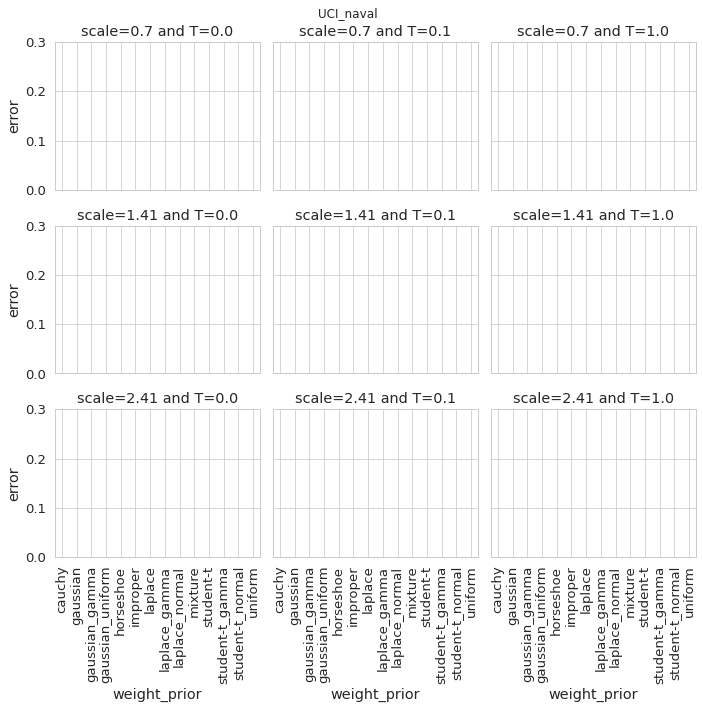

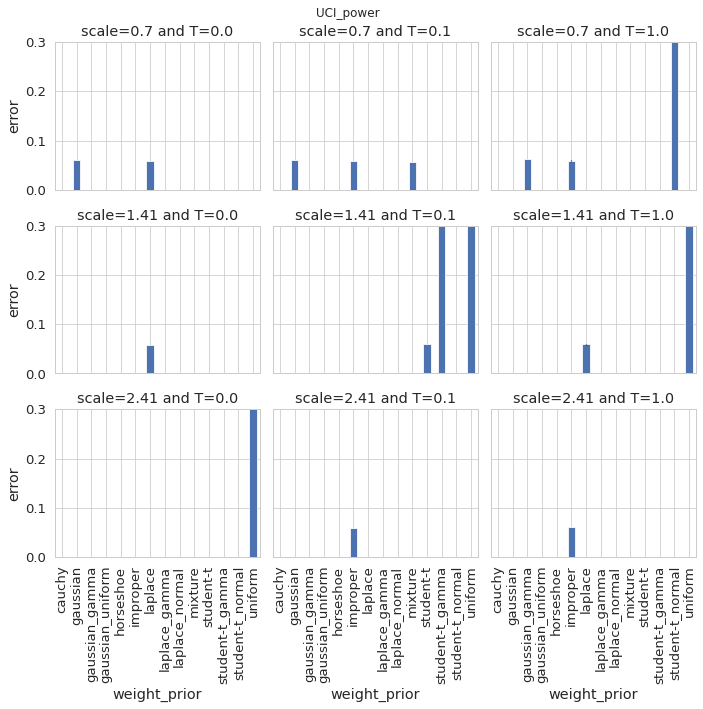

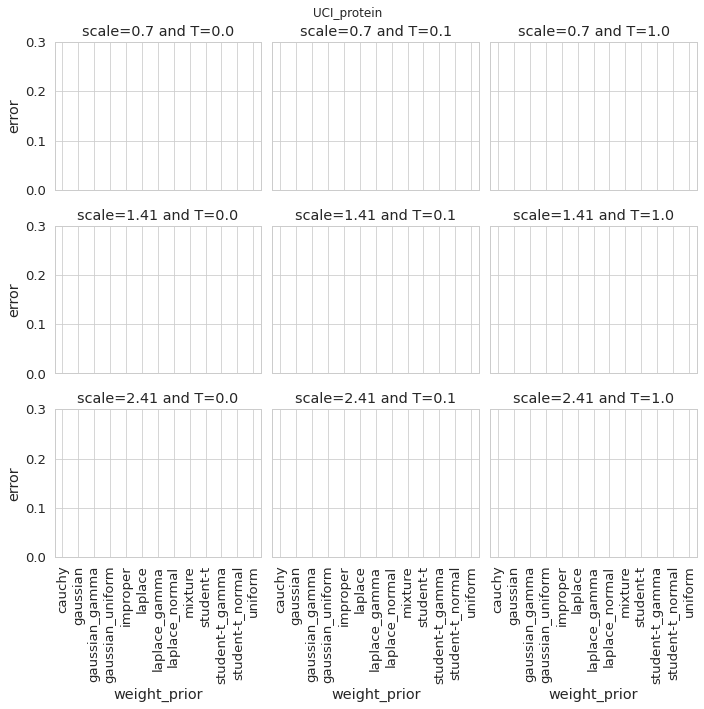

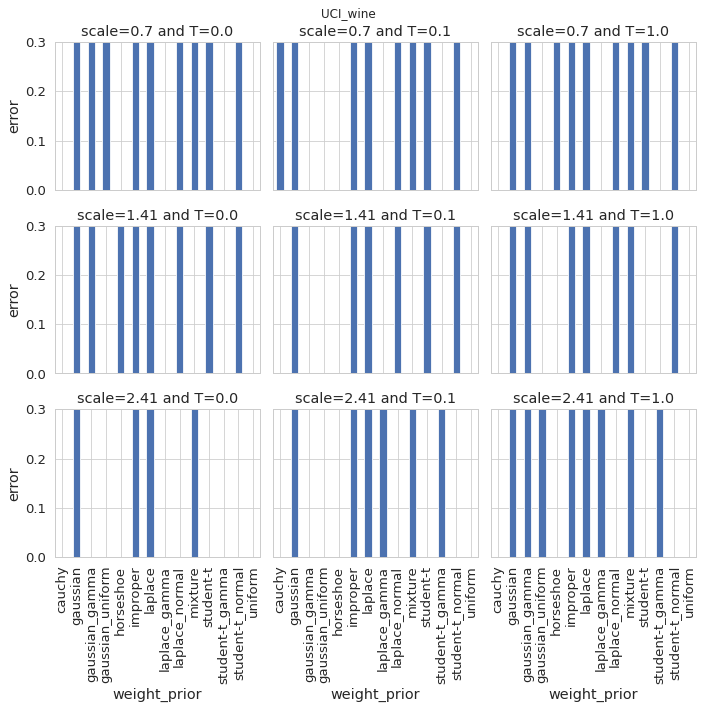

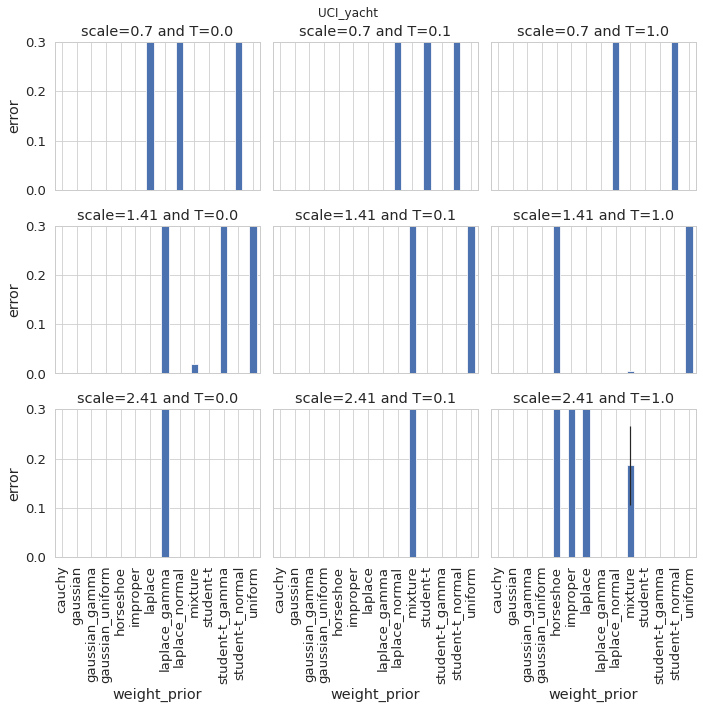

In [13]:
with PdfPages(f"../figures/{exp_name}_error.pdf") as pdf:
    for dataset in datasets:
        runs_selected = runs_all.query(f"data == '{dataset}'")
        fig = plot_grid(runs_selected, y="acc_mean", yerr="acc_stderr", ylabel="error", ylim=(0.,0.3), title=dataset)
        pdf.savefig()

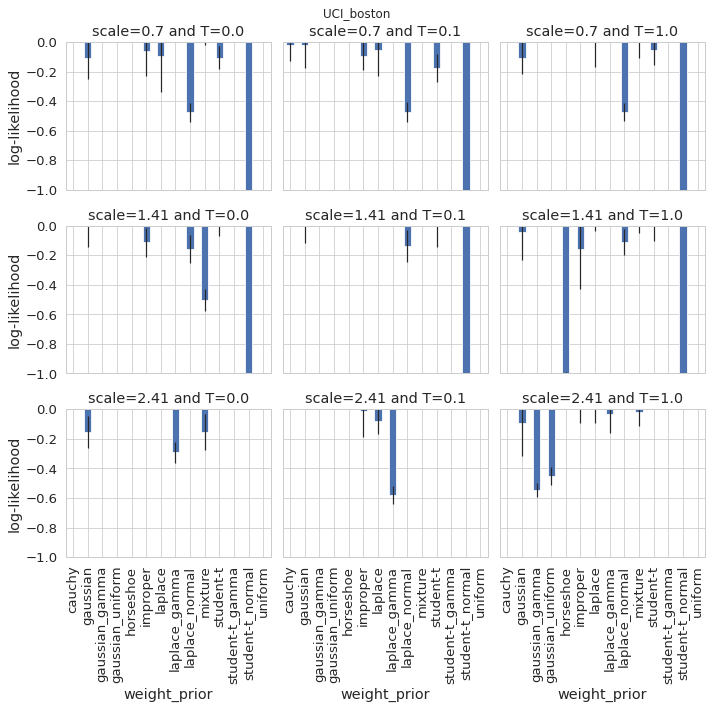

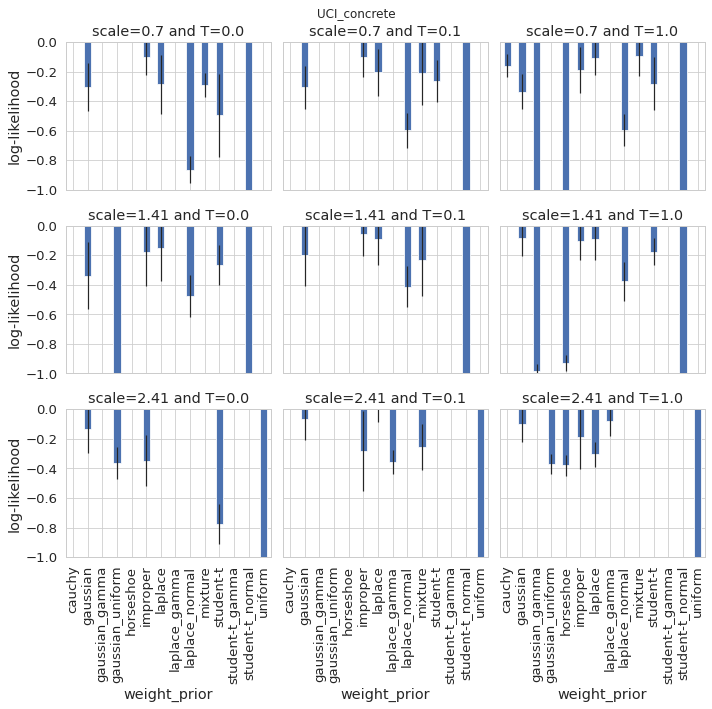

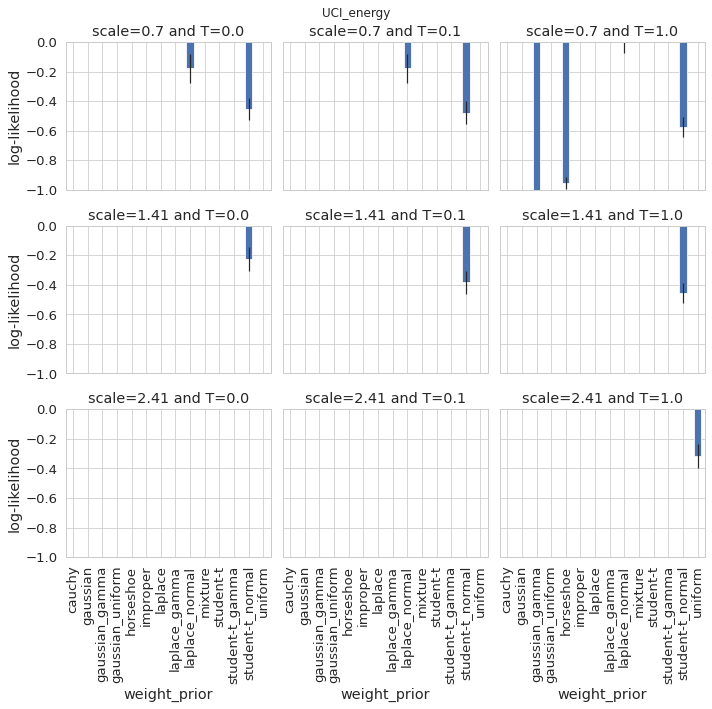

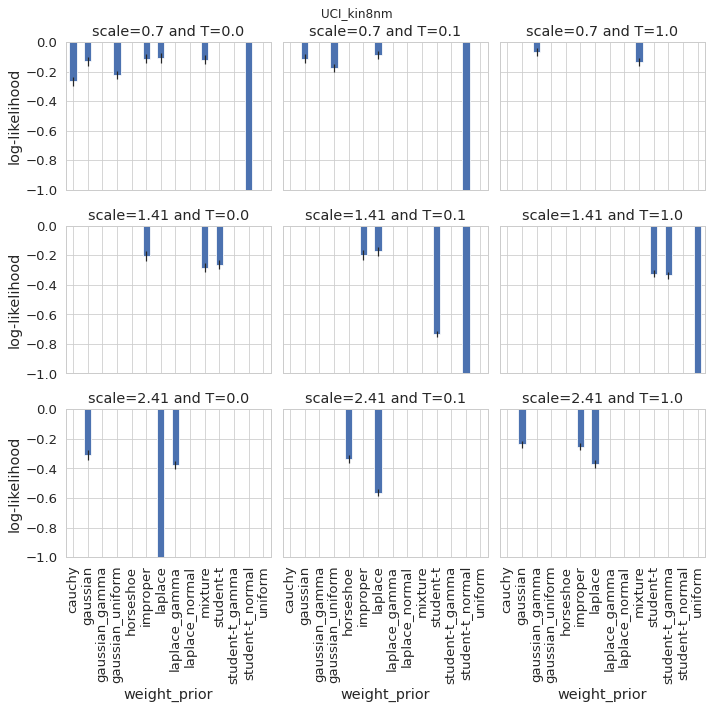

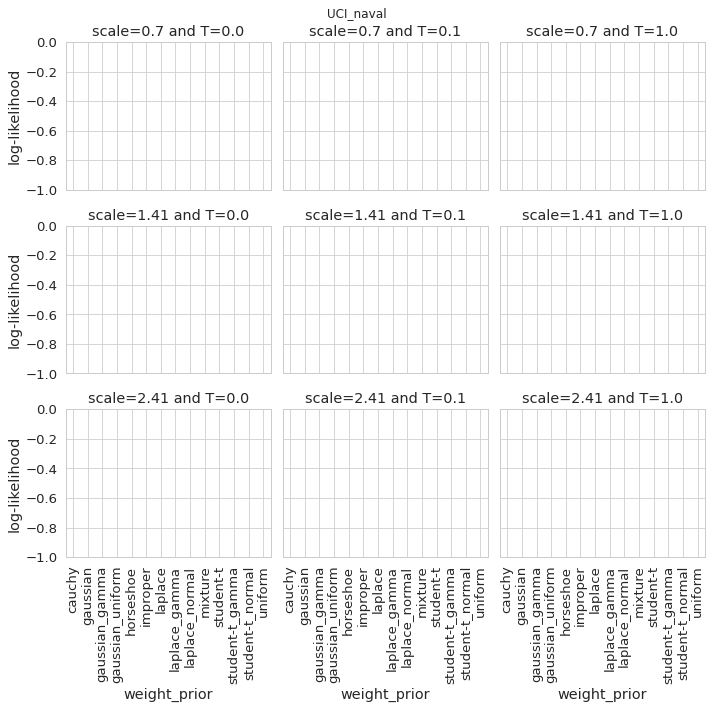

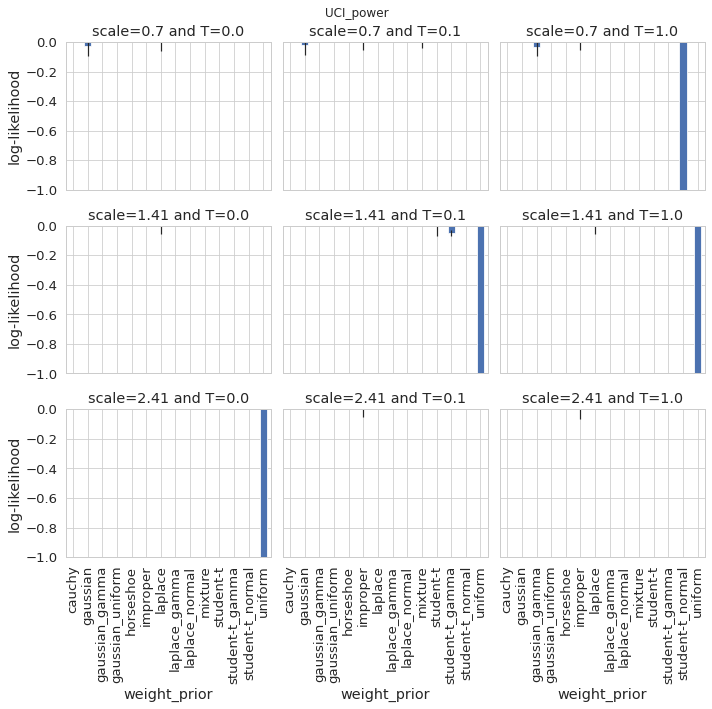

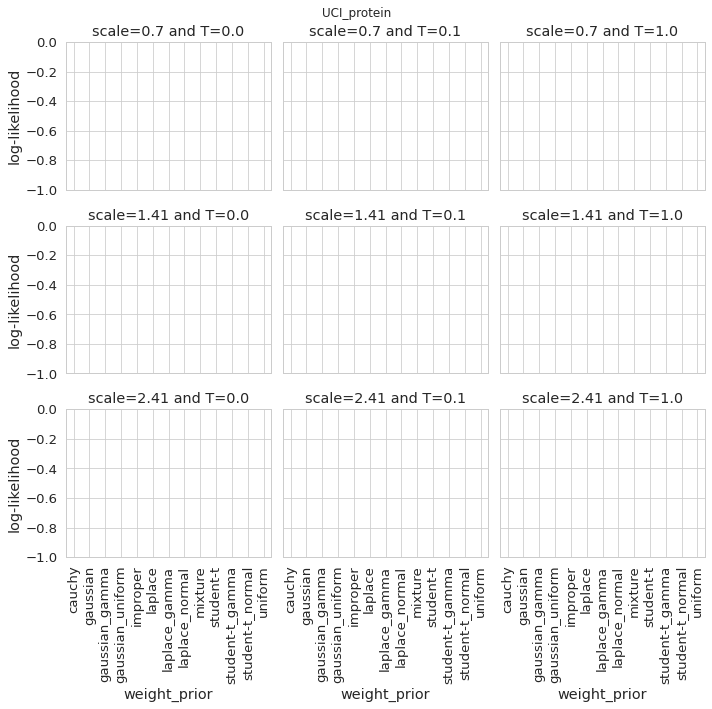

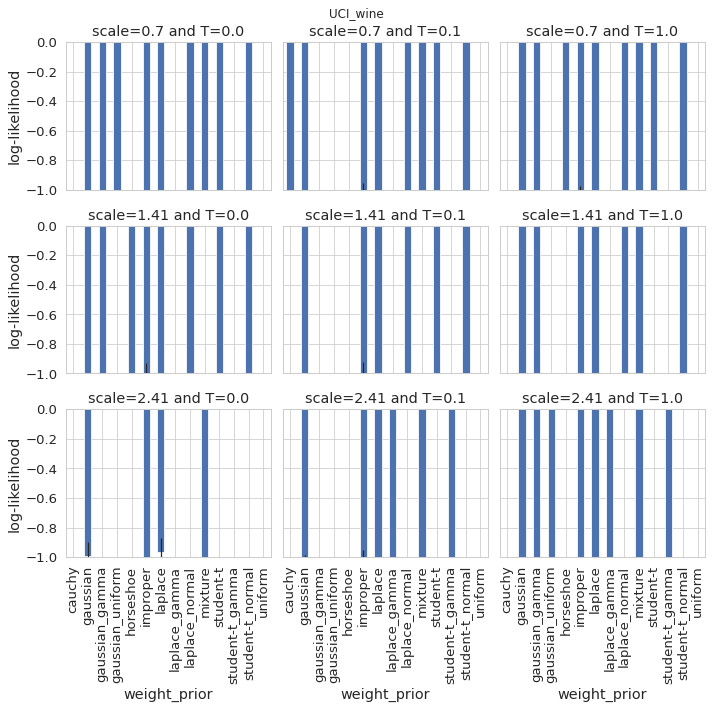

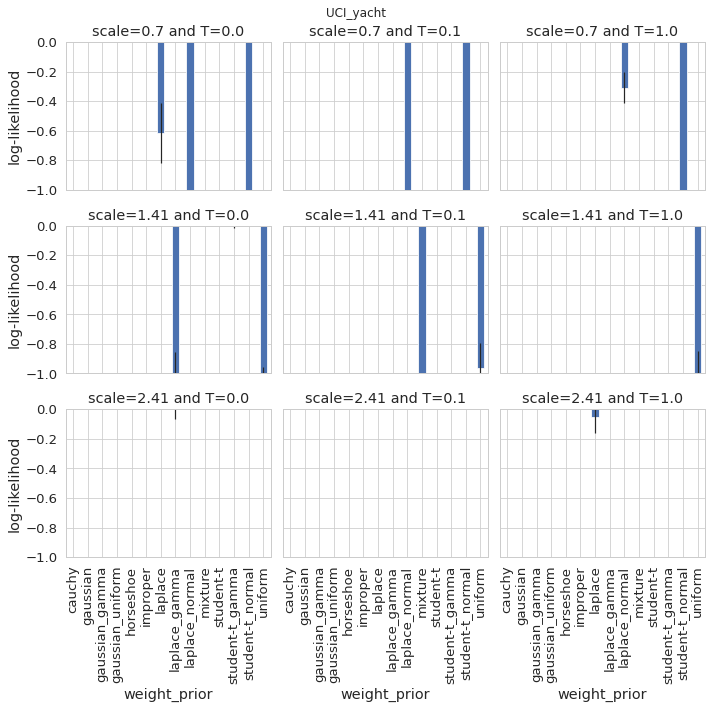

In [14]:
with PdfPages(f"../figures/{exp_name}_ll.pdf") as pdf:
    for dataset in datasets:
        runs_selected = runs_all.query(f"data == '{dataset}'")
        fig = plot_grid(runs_selected, y="lp_mean", yerr="lp_stderr", ylabel="log-likelihood", ylim=(-1., 0), title=dataset)
        pdf.savefig()